In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Genralis/Fall 2025/help/bank_marketing_dataset.csv')

In [4]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


# Data Preparation

In [5]:
df.isnull().sum()

,0
lead_source,128
industry,134
number_of_courses_viewed,0
annual_income,181
employment_status,100
location,63
interaction_count,0
lead_score,0
converted,0


In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score', 'converted'],
      dtype='object')

In [8]:
for cat_col in categorical_cols:
    if df[cat_col].isnull().any():
        df[cat_col].fillna('NA', inplace = True)



/tmp/ipython-input-3827316812.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cat_col].fillna('NA', inplace = True)


In [9]:
for num_col in numerical_cols:
    if df[num_col].isnull().any():
        df[num_col].fillna(0, inplace = True)

/tmp/ipython-input-127394378.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[num_col].fillna(0, inplace = True)


In [10]:
df.isnull().sum()

,0
lead_source,0
industry,0
number_of_courses_viewed,0
annual_income,0
employment_status,0
location,0
interaction_count,0
lead_score,0
converted,0


In [11]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [12]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [13]:
df_train = df_train.reset_index(drop = True)

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
# 2. Define features and target
numerical_features = ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']
target_variable = 'converted'
y_train = df_train[target_variable]
y_val = df_val[target_variable]

auc_results = {}

In [16]:
# 3 & 4. Calculate AUC for each numerical feature and invert if AUC < 0.5
for col in numerical_features:
    # Use the feature as the prediction score
    y_pred = df_train[col]

    # Calculate initial AUC
    initial_auc = roc_auc_score(y_train, y_pred)
    current_auc = initial_auc

    # Check for inversion
    if initial_auc < 0.5:
        # Invert the variable by negating it
        y_pred_inverted = -df_train[col]
        current_auc = roc_auc_score(y_train, y_pred_inverted)
        print(f"Feature: {col}, Initial AUC: {initial_auc:.4f} (Inverted), Final AUC: {current_auc:.4f}")
    else:
        print(f"Feature: {col}, Initial AUC: {initial_auc:.4f} (Not Inverted), Final AUC: {current_auc:.4f}")

    # Store the final AUC
    auc_results[col] = current_auc

Feature: lead_score, Initial AUC: 0.6145 (Not Inverted), Final AUC: 0.6145
Feature: number_of_courses_viewed, Initial AUC: 0.7636 (Not Inverted), Final AUC: 0.7636
Feature: interaction_count, Initial AUC: 0.7383 (Not Inverted), Final AUC: 0.7383
Feature: annual_income, Initial AUC: 0.5520 (Not Inverted), Final AUC: 0.5520


In [17]:
highest_auc_feature = max(auc_results, key=auc_results.get)
highest_auc_value = auc_results[highest_auc_feature]

print(f"\nAUC Results: {auc_results}")
print(f"The numerical variable with the highest AUC is '{highest_auc_feature}' with an AUC of {highest_auc_value:.4f}")


AUC Results: {'lead_score': np.float64(0.6144993577250176), 'number_of_courses_viewed': np.float64(0.7635680590007088), 'interaction_count': np.float64(0.738270176293409), 'annual_income': np.float64(0.5519578313253012)}
The numerical variable with the highest AUC is 'number_of_courses_viewed' with an AUC of 0.7636


# Training the model

In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
dv = DictVectorizer(sparse = False)

In [20]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,events,manufacturing,2,95543.0,unemployed,europe,3,0.78,0
1,referral,NA,1,54924.0,student,south_america,6,0.39,1
2,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22,0
3,paid_ads,other,2,34600.0,employed,south_america,2,0.31,0
4,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01,0
...,...,...,...,...,...,...,...,...,...
871,NA,other,5,67314.0,NA,europe,2,0.87,1
872,events,education,6,63996.0,NA,australia,4,0.92,1
873,organic_search,finance,1,73702.0,unemployed,north_america,2,0.55,0
874,events,technology,1,93341.0,student,middle_east,4,0.99,0


In [21]:
categorical_cols = ['lead_source', 'industry', 'employment_status', 'location']
numerical_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [22]:
train_dicts = df_train[categorical_cols + numerical_cols].to_dict(orient = 'records')

In [23]:
train_dicts[0]

{'lead_source': 'events',
 'industry': 'manufacturing',
 'employment_status': 'unemployed',
 'location': 'europe',
 'number_of_courses_viewed': 2,
 'annual_income': 95543.0,
 'interaction_count': 3,
 'lead_score': 0.78}

# Test 1

In [24]:
X_train = dv.fit_transform(train_dicts)

In [25]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [26]:
X_train.shape

(876, 31)

In [27]:
val_dicts = df_val[categorical_cols + numerical_cols].to_dict(orient = 'records')

In [28]:
X_val = dv.transform(val_dicts)

In [29]:
X_val.shape

(293, 31)

In [30]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [31]:
y_train.shape

(876,)

In [32]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [33]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.6996587030716723


# Some testing

In [34]:
np.unique(y_val, return_counts=True)

(array([0, 1]), array([122, 171]))

In [35]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([ 48, 245]))

# Test plotting

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [37]:
y_scores = model.predict_proba(X_val)[:, 1]

In [38]:
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

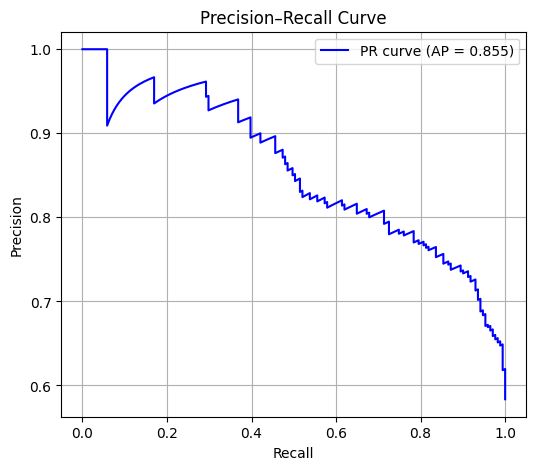

In [39]:
ap = average_precision_score(y_val, y_scores)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', label=f'PR curve (AP = {ap:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score

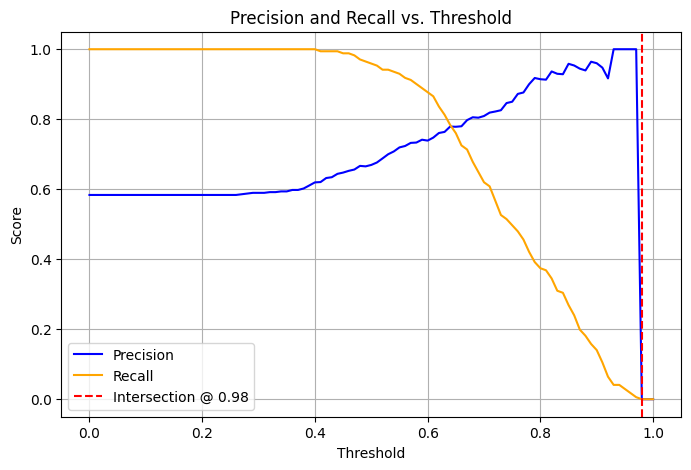

Intersection threshold = 0.98
Precision = 0.000, Recall = 0.000


In [41]:
thresholds = np.arange(0.0, 1.01, 0.01)

precision_list = []
recall_list = []

# compute precision and recall for each threshold
for t in thresholds:
    y_pred = (y_scores >= t).astype(int)
    precision_list.append(precision_score(y_val, y_pred, zero_division=0))
    recall_list.append(recall_score(y_val, y_pred))

precision_list = np.array(precision_list)
recall_list = np.array(recall_list)

# find intersection
diff = np.abs(precision_list - recall_list)
ix = np.argmin(diff)
threshold_at_intersection = thresholds[ix]

# plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_list, label='Precision', color='blue')
plt.plot(thresholds, recall_list, label='Recall', color='orange')
plt.axvline(threshold_at_intersection, color='red', linestyle='--',
            label=f'Intersection @ {threshold_at_intersection:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

print(f"Intersection threshold = {threshold_at_intersection:.2f}")
print(f"Precision = {precision_list[ix]:.3f}, Recall = {recall_list[ix]:.3f}")

In [42]:
# precision = precision[:-1]
# recall = recall[:-1]

# # find intersection index
# diff = np.abs(precision - recall)
# ix = np.argmin(diff)
# threshold_at_intersection = thresholds[ix]

# # plot
# plt.figure(figsize=(7, 5))
# plt.plot(thresholds, precision, label='Precision', color='blue')
# plt.plot(thresholds, recall, label='Recall', color='orange')
# plt.axvline(threshold_at_intersection, color='red', linestyle='--',
#             label=f'Intersection @ {threshold_at_intersection:.3f}')
# plt.xlabel('Threshold')
# plt.ylabel('Score')
# plt.title('Precision and Recall vs. Threshold')
# plt.legend()
# plt.grid(True)
# plt.show()

# print(f"Precision and recall intersect approximately at threshold = {threshold_at_intersection:.3f}")
# print(f"Precision = {precision[ix]:.3f}, Recall = {recall[ix]:.3f}")


# Plotting results